In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.stats import pearsonr
from scipy import stats
from scipy.stats import linregress
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import statsmodels.api
from scipy import stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Jeu de données

Les données concernent les automobilistes et leur aggrésivité au volant.<br>
Une conduite agressive peut avoir de très mauvaises conséquences. Elle peut facilement conduire à un homicide involontaire dû à la négligence des conducteurs. 
Etre capable de prédire les comportements au volant profitera aux collectivité territoriales.<br><br><br>

Descriptif des variables :<br><br>
    -ID: Identifiant du vehicule X <br>
    -Longueur: Longueur du véhicule X <br>
    -Poids: Poids du véhicule X<br>
    -Nombre d'essieus<br>
    -Date_heure: Date et heure auxquelles les données ont été collectées<br>
    -Route: Route sur laquelle le véhicule roule<br>
    -Vitesse: Vitesse à laquelle le véhicule X a été détécté<br>
    -xxx_vehicule_precedent: caractéristique du véhicule qui précède le vehicule X<br>
    -Air_temperature: Température de l'air<br>
    -Precipitation<br>
    -Precipitation_intensite: Niveau de précipitation<br>
    -Humidité<br>
    -Direction_vent: Direction du vent de 0 à 360°<br>
    -Vitesse_vent: vitesse du vent en m/s<br>
    -Condition_routiere: Etat de la route en fonction de la méteo (Sec, Mouillé, Verglas, Neige)<br>
    -Temps_journee: Luminosité (Lumière du jour, Nuit, Crépuscule)
<br>
    -Style_conduite: cet indicateur permet de classé les niveaux d'aggrésivité au volant <br>
    



<br><br><br>

le dataset provient de Kaggle (https://www.kaggle.com/datasets/veeralakrishna/aggressive-driving-data/code)

In [10]:
df = pd.read_csv('/content/donnees (1).csv', sep = ';')
df.head(5)
print(df.shape)

(162566, 21)


Nous voyons ci-dessus la moyenne, l'écart type, le minimum, le premier quartile, le troisième quartile, la médiane ainsi que le maximum pour chaque variable quantitative. <br>
Par exemple, nous observons que le poids des véhicules varie entre 44 et 57 230 kg.

In [5]:
df.describe()

,Longueur,Poids,Nb_essieus,Style_conduite,Route,Vitesse,ID_vehicule_precedent,Vitesse_vehicule_precedent,Poids_vehicule_precedent,Longueur_vehicule_precedent,Temps_entre_vehicules,Air_temperature,Humidité,Direction_vent,Vitesse_vent
count,66556.000000,66556.000000,66556.000000,66556.000000,66556.000000,66556.000000,66556.000000,66556.000000,66556.000000,66555.000000,65345.000000,65840.000000,65840.000000,65840.000000,65816.000000
mean,803.531102,5531.032394,2.679052,2.170653,1.500421,83.281688,151202.826447,83.321759,4945.236493,764.325505,91.868620,5.082093,64.099408,188.357792,4.000258
std,450.337908,8080.702436,1.343947,0.657724,0.500004,9.642906,113108.076123,9.654999,7744.458476,457.427348,158.540935,2.982880,18.884315,114.113359,3.025971
min,155.000000,44.000000,2.000000,1.000000,1.000000,8.000000,20.000000,0.000000,3.000000,102.000000,1.000000,-6.000000,16.000000,6.000000,0.000000
25%,548.000000,1622.000000,2.000000,2.000000,1.000000,78.000000,92171.750000,78.000000,1527.000000,527.000000,5.000000,3.000000,48.000000,79.000000,1.000000
50%,571.000000,2014.000000,2.000000,2.000000,2.000000,83.000000,129478.500000,83.000000,1915.000000,559.000000,37.000000,5.000000,65.000000,186.000000,4.000000
75%,795.000000,3005.000000,2.000000,3.000000,2.000000,88.000000,161255.250000,88.000000,2655.250000,655.000000,109.000000,7.000000,81.000000,304.000000,7.000000
max,2254.000000,57230.000000,8.000000,3.000000,2.000000,161.000000,558950.000000,161.000000,69548.000000,2981.000000,1783.000000,24.000000,97.000000,360.000000,11.000000


# Analyse descriptive

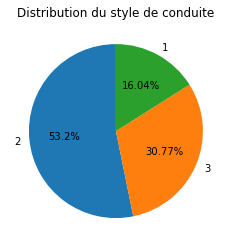

In [ ]:
conduite = df['Style_conduite'].value_counts()
plt.pie(conduite, labels=conduite.index, startangle=90, autopct = lambda x: str(round(x, 2)) + '%') 
plt.title('Distribution du style de conduite')
plt.show()

Nous remarquons ici, qu'environ la moitié de la population a une conduite neutre (=2). Nous analysons toutefois plus d'un quart de cette population a une conduite nerveuse (=1).

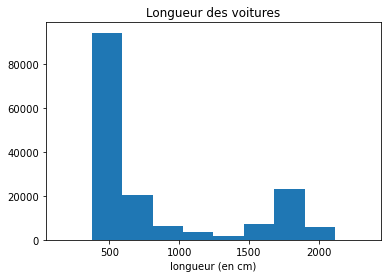

In [ ]:
plt.hist(df['Longueur'])
plt.xlabel('longueur (en cm)')
plt.title('Longueur des voitures')
plt.show()

Nous observons que la majorité des voitures dans ce jeu de données ont une taille compris entre 450 et 550 cm.

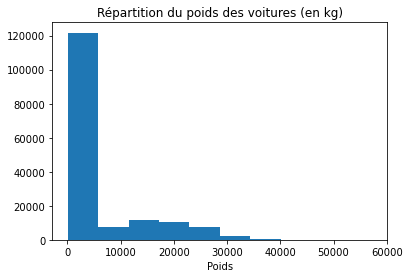

In [ ]:
plt.hist(df['Poids'])
plt.xlabel('Poids')
plt.title('Répartition du poids des voitures (en kg)')
plt.show()

Nous voyons que le poids de la majorité des véhicules ont un poids inférieur à 5 000 kg.

In [ ]:
table = pd.pivot_table(df,
                       index=['Style_conduite', 'Condition_routiere'],
                       values=['Longueur', 'Poids','Vitesse', 'Vitesse_vent'])
table

Longueur         Poids    Vitesse  \
Style_conduite Condition_routiere                                         
1              Dry                 1364.478307  13616.468143  83.697209   
               Snow covered        1160.765112   6749.120898  71.293610   
               Visible tracks      1442.559946  13267.956403  76.562670   
               Wet                 1064.451585   9558.905589  82.994385   
2              Dry                  806.977156   5054.807276  83.696277   
               Snow covered         833.225071   3347.558405  67.945869   
               Visible tracks       826.278589   5154.836740  74.847445   
               Wet                  745.879002   4504.984642  82.203320   
3              Dry                  806.388277   5116.140638  85.237120   
               Snow covered        1032.600000   4334.066667  71.419048   
               Visible tracks       878.997106   5239.833575  82.015919   
               Wet                  739.870144   4273.789209  83.725659   

                                   Vitesse_vent  
Style_conduite Condition_routiere                
1              Dry                     4.329868  
               Snow covered            4.269097  
               Visible tracks          4.324693  
               Wet                     3.656340  
2              Dry                     4.126982  
               Snow covered            4.149666  
               Visible tracks          4.450961  
               Wet                     3.756932  
3              Dry                     4.615282  
               Snow covered            4.380952  
               Visible tracks          5.344023  
               Wet                     3.757965

In [ ]:
table2 = pd.pivot_table(df,
                       index=['Style_conduite', 'Temps_journee'],
                       values=['Longueur', 'Poids','Vitesse', 'Vitesse_vent'])
table2

Longueur         Poids    Vitesse  \
Style_conduite Temps_journee                                         
1              daylight       1102.799293   9615.976481  83.645447   
               night          1302.441841  12819.532624  82.627562   
               twilight        969.448203   7614.037209  83.295137   
2              daylight        755.266879   4312.767366  83.920412   
               night           850.369488   5743.305471  81.507385   
               twilight        748.086387   4267.987740  82.685175   
3              daylight       1071.470990   8652.368601  82.750853   
               night           806.844533   5161.693157  84.866397   
               twilight        743.347209   4033.878401  85.180924   

                              Vitesse_vent  
Style_conduite Temps_journee                
1              daylight           4.733645  
               night              3.822848  
               twilight           3.902904  
2              daylight           4.511612  
               night              3.631065  
               twilight           3.745755  
3              daylight           5.423208  
               night              4.359537  
               twilight           4.997324

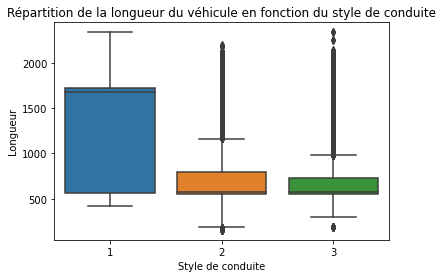

In [ ]:
sns.boxplot(x='Style_conduite', y='Longueur', data=df) 
plt.title('Répartition de la longueur du véhicule en fonction du style de conduite')
plt.ylabel('Longueur (en cm)')
plt.xlabel('Style de conduite')
plt.show()

Nous remarquons que plus le véhicule est grand et plus le conducteur aura tendance à avoir une conduite agressive.

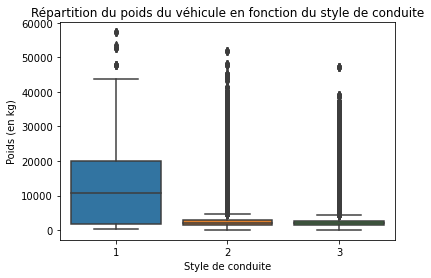

In [ ]:
sns.boxplot(x='Style_conduite', y='Poids', data=df) 
plt.title('Répartition du poids du véhicule en fonction du style de conduite')
plt.ylabel('Poids (en kg)')
plt.xlabel('Style de conduite')
plt.show()

Nous remarquons également que plus le poids du véhicule sera important et plus la conduite sera agressive.

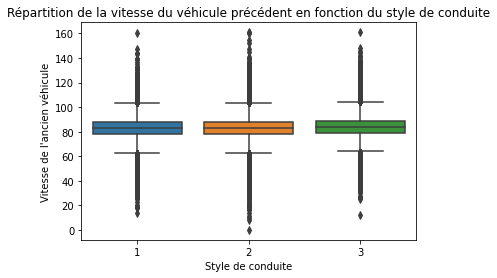

In [ ]:
sns.boxplot(x='Style_conduite', y='Vitesse_vehicule_precedent', data=df) 
plt.title('Répartition de la vitesse du véhicule précédent en fonction du style de conduite')
plt.ylabel('Vitesse de l\'ancien véhicule')
plt.xlabel('Style de conduite')
plt.show()

Nous analysons qu'il n'y a pas forcément de lien entre la vitesse du véhicule précédent du conducteur et de son style de conduite.

In [ ]:
table = pd.pivot_table(df,
                       index=['Style_conduite', 'Precipitation'],
                       values=['Longueur', 'Poids','Vitesse', 'Vitesse_vent'])
table

Longueur         Poids    Vitesse  \
Style_conduite Precipitation                                         
1              clear          1242.262198  11849.124962  83.106724   
               rain           1059.957935  10171.786488  82.641173   
               snow           1191.222962   9775.120632  79.422629   
2              clear           799.286138   4994.559148  83.070650   
               rain            762.621343   4657.615749  79.123064   
               snow            737.587816   3586.401482  78.647366   
3              clear           799.705834   5001.172807  85.006070   
               rain            725.584354   4467.734694  83.613605   
               snow            765.405282   4557.000000  82.565574   

                              Vitesse_vent  
Style_conduite Precipitation                
1              clear              4.010158  
               rain               3.811900  
               snow               4.888502  
2              clear              4.067170  
               rain               4.262840  
               snow               3.879984  
3              clear              4.484799  
               rain               4.097411  
               snow               5.141946

# Test statistique

Dans cette partie, nous allons voir les test statistique pour évaluer la dépendance entre les variables. 
Pour cela, nous avons vu que pour : <br>
    - Deux variables quantitatives, il faudra effectuer le test de Pearson <br>
    - Deux variables qualitatives, il faudra faire le test du chi2 avec le V de Cramer <br>
    - Une variable qualitative et une variable quantitative, il faudra faire l'Anova <br>
<br> 
### 1) Test de Pearson
Nous commençons donc par le test de Pearson avec les variables quantitatives <br> 
<br>
Nous posons nos hypothèses de test : <br>
    - H0 : Indépendance des variables <br>
    - H1 : Dépendance des variables 

Nous regardons tout d'abord la dépendance entre les variables longueur et poids.

In [11]:
pd.DataFrame(pearsonr(df['Longueur'], df['Poids']), 
             index =['pearson_coeff', 'p-value'],columns = ['resultat_test'])

,resultat_test
pearson_coeff,0.889008
p-value,0.000000


Nous remarquons ici que la p-valeur est inférieur à 5% donc on va rejetter l'hypothèse H0. Les variables longueur et poids sont donc dépendantes. <br>
De plus, nous voyons que le coefficient de pearson est proche de 1 donc ces variables présentent une forte dépendance entre elles. <br> 
Nous pouvons tracer la droite de regression linéaire

In [ ]:
def Predit (X):
    return slope * X + intercept

In [ ]:
slope, intercept, r, p, se = linregress(df['Longueur'], df['Poids'])
result = linregress(df['Longueur'], df['Poids'])
res = stats.linregress(df['Longueur'], df['Poids'])

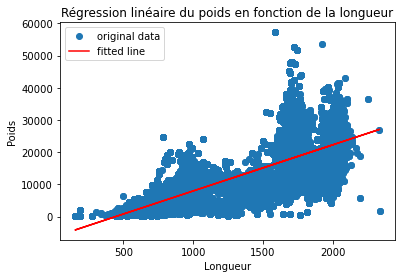

In [ ]:
plt.plot(df['Longueur'], df['Poids'], 'o', label='original data')
plt.plot(df['Longueur'], res.intercept + res.slope*df['Longueur'], 'r', label='fitted line')
plt.legend()
plt.title('Régression linéaire du poids en fonction de la longueur')
plt.xlabel('Longueur')
plt.ylabel('Poids')
plt.show()

Cette régression linéaire confirme bien la dépendance des variables. <br> 
Nous pouvons calculer l'erreur entre les y réel et y prédit. 

In [ ]:
data_err = pd.DataFrame(df['Poids'] )
data_err

,Poids
0,10243
1,10243
2,10243
3,10243
4,10243
...,...
162561,3244
162562,3244
162563,3244
162564,27812


In [ ]:
data_err['Predict (Y)'] = Predit(df['Longueur'])
data_err

,Poids,Predict (Y)
0,10243,11738.722145
1,10243,11738.722145
2,10243,11738.722145
3,10243,11738.722145
4,10243,11738.722145
...,...,...
162561,3244,3794.075202
162562,3244,3794.075202
162563,3244,3794.075202
162564,27812,22274.326019


In [ ]:
data_err['residu'] = data_err['Poids'] - data_err['Predict (Y)']
data_err

,Poids,Predict (Y),residu
0,10243,11738.722145,-1495.722145
1,10243,11738.722145,-1495.722145
2,10243,11738.722145,-1495.722145
3,10243,11738.722145,-1495.722145
4,10243,11738.722145,-1495.722145
...,...,...,...
162561,3244,3794.075202,-550.075202
162562,3244,3794.075202,-550.075202
162563,3244,3794.075202,-550.075202
162564,27812,22274.326019,5537.673981


Nous regardons ensuite la dépendance entre les variables longueur et vitesse. <br> 
Nous avons donc les mêmes hypothèses de test : <br> 
    - H0 : Indépendance des variables <br>
    - H1 : Dépendance des variables 

In [13]:
pd.DataFrame(pearsonr(df['Longueur'], df['Vitesse']), 
             index =['pearson_coeff', 'p-value'],columns = ['resultat_test'])

,resultat_test
pearson_coeff,-1.913088e-02
p-value,1.218215e-14


Nous remarquons ici que la p-valeur est inférieur à 5% donc on va rejetter l'hypothèse H0. Les variables longueur et vitesse sont donc dépendantes. <br>
Nous pouvons tracer la droite de regression linéaire

In [ ]:
slope, intercept, r, p, se = linregress(df['Longueur'], df['Vitesse'])
result2 = linregress(df['Longueur'], df['Vitesse'])
res2 = stats.linregress(df['Longueur'], df['Vitesse'])

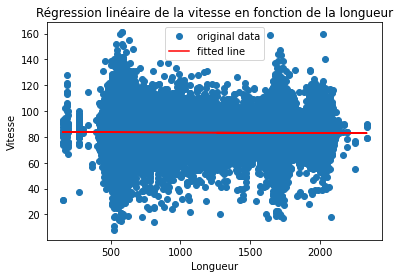

In [ ]:
plt.plot(df['Longueur'], df['Vitesse'], 'o', label='original data')
plt.plot(df['Longueur'], res2.intercept + res2.slope*df['Longueur'], 'r', label='fitted line')
plt.legend()
plt.title('Régression linéaire de la vitesse en fonction de la longueur')
plt.xlabel('Longueur')
plt.ylabel('Vitesse')
plt.show()

Nous voyons bien qu'il y a une dépendance entre ces variables avec cette régression linéaire.

Nous regardons enfin la dépendance entre les variables poids et vitesse. <br>
H0 : indépendance des variables 

In [7]:
pd.DataFrame(pearsonr(df['Poids'], df['Vitesse']), 
             index =['pearson_coeff', 'p-value'],columns = ['resultat_test'])

,resultat_test
pearson_coeff,1.961395e-02
p-value,4.181869e-07


Nous remarquons ici que la p-valeur est inférieur à 5% donc on va rejetter l'hypothèse H0. Les variables longueur et vitesse sont donc dépendantes. <br>
Nous pouvons tracer la droite de regression linéaire

In [ ]:
slope, intercept, r, p, se = linregress(df['Poids'], df['Vitesse'])
result3 = linregress(df['Poids'], df['Vitesse'])
res3 = stats.linregress(df['Poids'], df['Vitesse'])

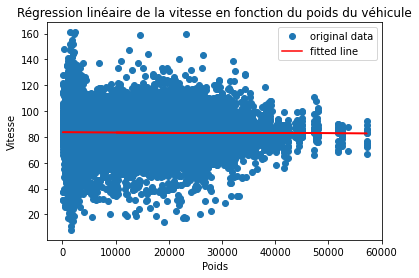

In [ ]:
plt.plot(df['Poids'], df['Vitesse'], 'o', label='original data')
plt.plot(df['Poids'], res3.intercept + res3.slope*df['Poids'], 'r', label='fitted line')
plt.legend()
plt.title('Régression linéaire de la vitesse en fonction du poids du véhicule')
plt.xlabel('Poids')
plt.ylabel('Vitesse')
plt.show()

Nous voyons bien qu'il y a une dépendance entre ces variables avec cette régression linéaire.

### 2) Test Chi2
Nous passons ensuite à l'étape du test du Chi2 avec le V de Cramer. 
Les hypothèses de test vont être les suivantes : <br>
    - H0 : Indépendance des variables <br>
    - H1 : Dépendance des variables 

Nous regardons d'abord la dépendance entre les variables style de conduite et temps journée.

In [ ]:
table = pd.crosstab(df['Style_conduite'], df['Temps_journee'])
table

Temps_journee,daylight,night,twilight
Style_conduite,,,
1,5655,18054,2365
2,42079,37303,7096
3,293,40568,9153


In [ ]:
test_result = chi2_contingency(table)
statistic = test_result[0]
p_value = test_result[1]
degree_of_freedom = test_result[2]

In [ ]:
#Méthode 1
prob = 0.95
critique = chi2.ppf(prob, test_result[2])
if abs(test_result[0]) >= critique:
    print('reject H0')
else:
    print('fail to reject H0')
    
#Méthode 2
print("La p-valeur est égale à", p_value)

reject H0
La p-valeur est égale à 0.0


La p-valeur est inférieur à 5% donc on rejette H0. Il existe donc une dépendance entre le style de conduite et le temps avec un risque alpha de 5%.

Ensuite, nous regardons la dépendance entre style de conduite et précipitation. 

In [ ]:
table2 = pd.crosstab(df['Style_conduite'], df['Precipitation'])
table2

Precipitation,clear,rain,snow
Style_conduite,,,
1,23303,1569,1202
2,80510,2324,3644
3,47446,1470,1098


In [ ]:
test_result = chi2_contingency(table2)
statistic = test_result[0]
p_value = test_result[1]
degree_of_freedom = test_result[2]

In [ ]:
#Méthode 1
prob = 0.95
critique = chi2.ppf(prob, test_result[2])
if abs(test_result[0]) >= critique:
    print('reject H0')
else:
    print('fail to reject H0')
    
#Méthode 2
print("La p-valeur est égale à", p_value)

reject H0
La p-valeur est égale à 7.323861304478507e-256


La p-valeur est inférieur à 5% donc on rejette H0. Il existe donc une dépendance entre le style de conduite et les précipitation avec un risque alpha de 5%.

Nous analysons enfin la dépendance entre le style de conduite et la condition routière.

In [ ]:
table3 = pd.crosstab(df['Style_conduite'], df['Condition_routiere'])
table3

Condition_routiere,Dry,Snow covered,Visible tracks,Wet
Style_conduite,,,,
1,13184,579,734,11577
2,63604,1053,4110,17711
3,40878,105,691,8340


In [ ]:
test_result = chi2_contingency(table3)
statistic = test_result[0]
p_value = test_result[1]
degree_of_freedom = test_result[2]

In [ ]:
#Méthode 1
prob = 0.95
critique = chi2.ppf(prob, test_result[2])
if abs(test_result[0]) >= critique:
    print('reject H0')
else:
    print('fail to reject H0')
    
#Méthode 2
print("La p-valeur est égale à", p_value)

reject H0
La p-valeur est égale à 0.0


La p-valeur est inférieur à 5% donc on rejette H0. Il existe donc une dépendance entre le style de conduite et la condition routière avec un risque alpha de 5%.

### 3) Test Anova
Nous passons enfin avec le test Anova 

In [ ]:
table = pd.crosstab(df['Style_conduite'], df['Longueur'])
table

Longueur,155,176,186,192,276,301,337,340,368,393,...,2128,2139,2140,2167,2172,2193,2195,2254,2335,2337
Style_conduite,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,2,3,2,0,0,3,0,2,0
2,19,19,17,0,49,0,2,0,2,0,...,2,0,0,0,2,2,0,0,0,0
3,0,0,0,16,0,2,0,2,0,2,...,0,0,2,0,0,0,0,3,0,3


D'après le tableau de contingence, on remarque que la variable style de conduite contient 3 modalités différentes. <br>
On définit l'hypothèse null alors que la variable style de conduite n'a pas d'impact sur la variable longueur,
alors la moyenne devrait être la même pour les 3 modalités, donc H0: u1 = u2 = u3 <br>
On applique le test ANOVA en prenant un risque alpha = 5%

In [ ]:
result_Cases = statsmodels.formula.api.ols('Longueur ~ Style_conduite', data = df).fit()
table_Cases = statsmodels.api.stats.anova_lm(result_Cases)
table_Cases

,df,sum_sq,mean_sq,F,PR(>F)
Style_conduite,1.0,2.298314e+09,2.298314e+09,9947.561943,0.0
Residual,162564.0,3.755927e+10,2.310430e+05,NaN,NaN


Nous remarquons ici que la p-valeur est inférieur à 5% donc on va rejetter l'hypothèse H0. Nous pouvons donc dire que les variables style de conduite et longueur sont dépendantes entre elles.

La variable style de conduite est qualitative et la variable vitesse vehicule precedent est quantitative, le test ANOVA sera donc appliqué <br>
On définit alors H0 : u1 = u2 = u3

In [ ]:
result_Cases2 = statsmodels.formula.api.ols('Vitesse_vehicule_precedent ~ Style_conduite', data = df).fit()
table_Cases2 = statsmodels.api.stats.anova_lm(result_Cases2)
table_Cases2

,df,sum_sq,mean_sq,F,PR(>F)
Style_conduite,1.0,8.730230e+04,87302.303691,999.810088,9.157574e-219
Residual,162564.0,1.419491e+07,87.318887,NaN,NaN


Nous remarquons ici que la p-valeur est inférieur à 5% donc on va rejetter l'hypothèse H0. Nous pouvons donc dire que les variables style de conduite et vitesse du véhicule précédent sont dépendantes entre elles.

Nous effectuons un test ANOVA avec la variable style de conduite et longueur véhicule précédent (variable quantitative) <br>
On définit alors H0 : u1 = u2 = u3

In [ ]:
result_Cases3 = statsmodels.formula.api.ols('Longueur_vehicule_precedent ~ Style_conduite', data = df).fit()
table_Cases3 = statsmodels.api.stats.anova_lm(result_Cases3)
table_Cases3 

,df,sum_sq,mean_sq,F,PR(>F)
Style_conduite,1.0,2.433560e+08,2.433560e+08,1054.517283,1.397592e-230
Residual,162564.0,3.751567e+10,2.307747e+05,NaN,NaN


Nous remarquons que la p-valeur est inférieur à 5% donc on va rejetter l'hypothèse H0. Nous pouvons donc dire que les variables style de conduite et longueur du véhicule précédent sont dépendantes entre elles.

Enfin, nous effectuons un dernier test ANOVA avec la variable style de conduite et poids (variable quantitative) <br>
On définit alors H0 : u1 = u2 = u3

In [ ]:
result_Cases4 = statsmodels.formula.api.ols('Poids ~ Style_conduite', data = df).fit()
table_Cases4 = statsmodels.api.stats.anova_lm(result_Cases4)
table_Cases4 

,df,sum_sq,mean_sq,F,PR(>F)
Style_conduite,1.0,5.462870e+11,5.462870e+11,9073.406339,0.0
Residual,162564.0,9.787570e+12,6.020749e+07,NaN,NaN


Nous remarquons que la p-valeur est inférieur à 5% donc on va rejetter l'hypothèse H0. Nous pouvons donc dire que les variables style de conduite et poids du véhicule sont dépendantes entre elles.